In [81]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import linalg as LA
from matplotlib.colors import LogNorm

In [93]:
#function to generate a spectrum with energy detuning:

def get_spectrum(E_detuning): #in keV
    #1. take sample spectrum
    #2. take detuned masked spectrum
    #3. convolute and get the image at the detector
    #4. GET A LIST of images with different detunings
    
    #1. sample spectrum
    
    w=np.linspace(10,20,100) #RANGE OF FREQUENCIES in keV
    sample_w_0= 15 #(keV)
    sample_fwhm_0= 1 #keV 
    
    sample_amp = 1/(1+4*(w-sample_w_0)**2/sample_fwhm_0**2) #normalised
    #sample_amp = 1/np.pi* (0.5*sample_fwhm_0/((w-sample_w_0)**2 +(0.5*sample_fwhm_0)**2) ) # from wolfram mathematica definition 
    sample_phase = np.pi/(1+np.exp(-2*(w-sample_w_0)))


    #mask spectrum  
    mask_w_0= 15 #(keV)
    mask_fwhm_0= 1 #neV
    mask_amp = 1/(1+4*(w-(mask_w_0+E_detuning))**2/mask_fwhm_0**2)
    #mask_amp = 1/np.pi* (0.5*mask_fwhm_0/((w-(mask_w_0+E_detuning))**2 +(0.5*mask_fwhm_0)**2) ) # from wolfram mathematica definition
    mask_phase = np.pi/(1+np.exp(-2*(w-(mask_w_0+E_detuning))))

    sample_data = sample_amp*np.exp(1j*sample_phase)
    mask_data   = mask_amp*np.exp(1j*mask_phase)
    
    exp_data= sample_data*mask_data
    #detector_img= sample_data
    detector_img= np.abs(np.fft.ifft(exp_data))**2

    img_freq = np.linspace(0,1/w[1]*4135, len(exp_data)) # the plot of time for the ifft
    
    return img_freq,detector_img,mask_data,sample_data

In [94]:
#simulate experimental data
img_data=[]
detuned_mask_data =[]
correct_obj_data =[]

for E_detuning in np.linspace(-1.5,1.5,50): #detuning unit in gamma, 50 copies of detuned measurements
    w, ydata, mask_data,obj_data = get_spectrum(E_detuning)
    img_data = np.concatenate((img_data, ydata), axis=None)
    detuned_mask_data=np.concatenate((detuned_mask_data,mask_data),axis =None)
    correct_obj_data=np.concatenate((correct_obj_data,obj_data),axis =None)


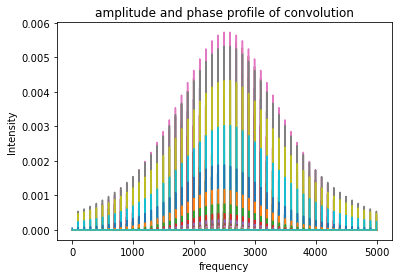

In [87]:
i=20
fig,ax= plt.subplots()
#ax.plot(w, np.angle(measured_data_list[i]))
ax.plot( abs(measured_data_list))
#ax.plot(w, exp_phase)
ax.set(xlabel = "frequency",
       ylabel = "Intensity",
       title = "amplitude and phase profile of convolution")
plt.show()

In [88]:
measured_data_list=np.diag(img_data) #50 Real measured Intensity spectra
mask_data_list = np.diag(detuned_mask_data) #50 Complex Mask spectra


In [96]:
obj_data_list = np.outer(np.conj(correct_obj_data), correct_obj_data, out=None)

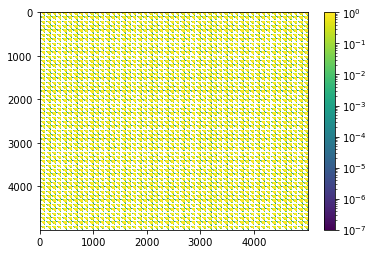

In [98]:

plt.imshow(np.angle(obj_data_list),interpolation='none',aspect='auto',norm = LogNorm(1e-7,1 ))
plt.colorbar()
plt.show()

In [63]:
H = np.fft.fft(measured_data_list,axis =0)
H = np.fft.fft(H,axis =1)

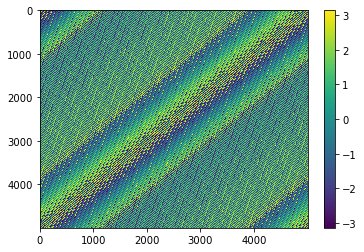

In [64]:
plt.imshow(np.angle(H),interpolation='none',aspect='auto')#,norm = LogNorm(1e-7,0.008)  )
plt.colorbar()
plt.show()

### CALCULATE WIGNER DISTRIBUTION OF A VECTOR


In [100]:
#CALCULATE THE STFT of a function with a given window and window length



### Discrete Short-Time Fourier Transform (STFT)

Following Section 2.1.4 of [Müller, FMP, Springer 2015], we discuss in this notebook a discrete version of the short-time Fourier transform (STFT).

In [ ]:
def getWigner(myarray,E_detunings):
    '''Approximate Wigner distribution of an array by Newton's method.

    Parameters
    ----------
    f : function
        Function for which we are searching for a solution f(x)=0.
    Df : function
        Derivative of f(x).
    x0 : number
        Initial guess for a solution f(x)=0. 
    epsilon : number
        Stopping criteria is abs(f(x)) < epsilon.
    max_iter : integer
        Maximum number of iterations of Newton's method.

    Returns
    -------
    W : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn - f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> Df = lambda x: 2*x - 1
    >>> newton(f,Df,1,1e-8,10)
    Found solution after 5 iterations.
    1.618033988749989
    '''
    

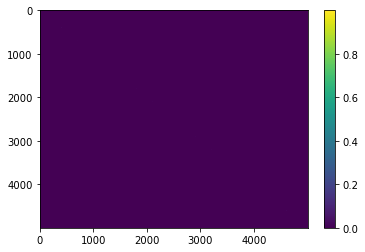

In [65]:
W_probe = mask_data_list
W_probe_star = np.transpose(np.conj(W_probe))
plt.imshow(np.abs(W_probe_star),interpolation='nearest',aspect='auto')
plt.colorbar()
plt.show()

In [68]:
epsilon = 0.00001
W_object = W_probe_star.dot(H)/(np.abs(W_probe)**2+ epsilon)

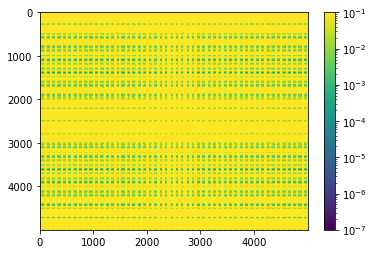

In [99]:
plt.imshow(np.abs(np.fft.fft(W_object)),interpolation='nearest',aspect='auto',norm = LogNorm(1e-7,0.1)  )
plt.colorbar()
plt.show()